# Performance of Ultra-Brain Science Student in JAMB 2024

## Objective

- To analyze the performance of Ultra-Brain Students in the JAMB 2024 exam
- To evaluate factors that contributed to their performance
- To create a dashboard that summarizes the performance of student

### Load the Libraries

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

### Import the data

In [2]:
#load the data
data = pd.read_excel('Jamb Score for UltraBrain Students.xlsx')

In [3]:
#display few lines of the data
data.head(2)

,S/N,Student Name,Martial Status,Gender,Year 2023,Year 2024,English,Chemistry,Physics,Biology,Total,Date of Birth,Course registered,School registered,Date Registered,Date Stopped,Lesson Fee,Work Status,Hours read,Read Past Questions,Teaching Satisfaction,Finished on time,System off,Questions different,Pay yourself,Close Proximity to center
0,1,Chinelo Nneto,Single,F,171.0,217,49,67,53,48,217,2006-01-14,Pharmacy,Unizik,2024-01-09,2024-04-19,13000,No,5,Yes,5,No,No,No,no,yes
1,2,Mmesoma Ofodile,Single,F,192.0,230,54,59,60,57,230,2007-08-12,Nursing,UNN,2024-01-10,2024-04-19,15000,No,4,Yes,5,Yes,No,No,no,yes


In [4]:
#checking the shape 
data.shape

(52, 26)

- Data contain 52 student records and 26 column

In [5]:
#checking for missing values
data.isna().sum()

S/N                           0
Student Name                  0
Martial Status                0
Gender                        0
Year 2023                    22
Year 2024                     0
English                       0
Chemistry                     0
Physics                       0
Biology                       0
Total                         0
Date of Birth                 0
Course registered             0
School registered             0
Date Registered               0
Date Stopped                  0
Lesson Fee                    0
Work Status                   0
Hours  read                   0
Read Past Questions           0
Teaching Satisfaction         0
Finished on time              0
System off                    0
Questions different           0
Pay yourself                  0
Close Proximity to center     0
dtype: int64

- There are 22 missing values in 2023 score

In [6]:
#checking for duplicates
data.duplicated().sum()

0

- There are no duplicates

In [7]:
#checking for datatypes
data.dtypes

S/N                                   int64
Student Name                         object
Martial Status                       object
Gender                               object
Year 2023                           float64
Year 2024                             int64
English                               int64
Chemistry                             int64
Physics                               int64
Biology                               int64
Total                                 int64
Date of Birth                datetime64[ns]
Course registered                    object
School registered                    object
Date Registered              datetime64[ns]
Date Stopped                 datetime64[ns]
Lesson Fee                            int64
Work Status                          object
Hours  read                           int64
Read Past Questions                  object
Teaching Satisfaction                 int64
Finished on time                     object
System off                      

## Data Wrangling

In [8]:
#create a copy of the dataframe
df = data.copy()

In [9]:
#checking column names
df.columns

Index(['S/N', 'Student Name', 'Martial Status', 'Gender', 'Year 2023',
       'Year 2024', 'English', 'Chemistry', 'Physics', 'Biology', 'Total',
       'Date of Birth', 'Course registered', 'School registered',
       'Date Registered', 'Date Stopped', 'Lesson Fee', 'Work Status',
       'Hours  read', 'Read Past Questions', 'Teaching Satisfaction',
       'Finished on time', 'System off', 'Questions different', 'Pay yourself',
       'Close Proximity to center'],
      dtype='object')

In [10]:
#changing Column names
df.rename(columns={
    'Martial Status': "Marital Status",
    "Course registered" : "Course Registered",
    "School registered" : "University Registered",
    "Hours  read" : "Hours Read",
    'System off': 'Computer Off',
    'Questions different': 'Questions Different',
    'Pay yourself': 'Pay Yourself',
    'Year 2023' : 'Score 2023',
    'Year 2024' : 'Score 2024'
}, inplace=True
         )

In [11]:
#confirming the column name has been changed
df.columns

Index(['S/N', 'Student Name', 'Marital Status', 'Gender', 'Year 2023',
       'Year 2024', 'English', 'Chemistry', 'Physics', 'Biology', 'Total',
       'Date of Birth', 'Course Registered', 'University Registered',
       'Date Registered', 'Date Stopped', 'Lesson Fee', 'Work Status',
       'Hours Read', 'Read Past Questions', 'Teaching Satisfaction',
       'Finished on time', 'Computer Off', 'Questions Different',
       'Pay Yourself', 'Close Proximity to center'],
      dtype='object')

In [12]:
#checking datatypes
df.dtypes

S/N                                   int64
Student Name                         object
Marital Status                       object
Gender                               object
Year 2023                           float64
Year 2024                             int64
English                               int64
Chemistry                             int64
Physics                               int64
Biology                               int64
Total                                 int64
Date of Birth                datetime64[ns]
Course Registered                    object
University Registered                object
Date Registered              datetime64[ns]
Date Stopped                 datetime64[ns]
Lesson Fee                            int64
Work Status                          object
Hours Read                            int64
Read Past Questions                  object
Teaching Satisfaction                 int64
Finished on time                     object
Computer Off                    

In [13]:
#deleting unnecessary column 'S/N'
df.drop('S/N', axis=1, inplace=True)

### Feature Engineering

In [18]:
#creating the student Age column
df['Student Age'] = df['Date Registered'].dt.year - df['Date of Birth'].dt.year

In [19]:
#confirming the Student Age is created
df.head()

,Student Name,Marital Status,Gender,Year 2023,Year 2024,English,Chemistry,Physics,Biology,Total,Date of Birth,Course Registered,University Registered,Date Registered,Date Stopped,Lesson Fee,Work Status,Hours Read,Read Past Questions,Teaching Satisfaction,Finished on time,Computer Off,Questions Different,Pay Yourself,Close Proximity to center,Student Age
0,Chinelo Nneto,Single,F,171.0,217,49,67,53,48,217,2006-01-14,Pharmacy,Unizik,2024-01-09,2024-04-19,13000,No,5,Yes,5,No,No,No,no,yes,18
1,Mmesoma Ofodile,Single,F,192.0,230,54,59,60,57,230,2007-08-12,Nursing,UNN,2024-01-10,2024-04-19,15000,No,4,Yes,5,Yes,No,No,no,yes,17
2,Delight Igboanugo,Single,F,NaN,231,64,61,51,55,231,2005-07-03,Pharmacy,Unizik,2024-01-11,2024-04-19,10000,No,4,Yes,4,Yes,No,No,Yes,No,19
3,Divine Ifedimma,Single,M,207.0,206,51,41,51,61,204,2004-12-27,Nursing,Unizik,2024-01-08,2024-04-19,13000,No,3,Yes,4,Yes,No,No,no,yes,20
4,Oluomachi Nwabuikwu,Single,F,175.0,179,49,47,44,39,179,2005-12-03,Nursing,Unizik,2024-01-10,2024-04-19,10000,No,4,Yes,5,Yes,No,No,no,yes,19


In [23]:
#creating the month registered
df['Month Registered'] = df['Date Registered'].dt.month
df['Month Name'] = df['Date Registered'].dt.month_name()
df['Month Stopped'] = df['Date Stopped'].dt.month

In [24]:
df.head(7)

,Student Name,Marital Status,Gender,Year 2023,Year 2024,English,Chemistry,Physics,Biology,Total,Date of Birth,Course Registered,University Registered,Date Registered,Date Stopped,Lesson Fee,Work Status,Hours Read,Read Past Questions,Teaching Satisfaction,Finished on time,Computer Off,Questions Different,Pay Yourself,Close Proximity to center,Student Age,Month Registered,Month Name,Month Stopped
0,Chinelo Nneto,Single,F,171.0,217,49,67,53,48,217,2006-01-14,Pharmacy,Unizik,2024-01-09,2024-04-19,13000,No,5,Yes,5,No,No,No,no,yes,18,1,January,4
1,Mmesoma Ofodile,Single,F,192.0,230,54,59,60,57,230,2007-08-12,Nursing,UNN,2024-01-10,2024-04-19,15000,No,4,Yes,5,Yes,No,No,no,yes,17,1,January,4
2,Delight Igboanugo,Single,F,NaN,231,64,61,51,55,231,2005-07-03,Pharmacy,Unizik,2024-01-11,2024-04-19,10000,No,4,Yes,4,Yes,No,No,Yes,No,19,1,January,4
3,Divine Ifedimma,Single,M,207.0,206,51,41,51,61,204,2004-12-27,Nursing,Unizik,2024-01-08,2024-04-19,13000,No,3,Yes,4,Yes,No,No,no,yes,20,1,January,4
4,Oluomachi Nwabuikwu,Single,F,175.0,179,49,47,44,39,179,2005-12-03,Nursing,Unizik,2024-01-10,2024-04-19,10000,No,4,Yes,5,Yes,No,No,no,yes,19,1,January,4
5,Ilozor Chidimma,Single,F,NaN,228,56,55,61,56,228,2006-11-16,Pharmacy,Unizik,2024-01-15,2024-04-19,10000,No,3,Yes,5,Yes,yes,No,no,yes,18,1,January,4
6,Nwogbo Chioma,Single,F,180.0,205,57,48,47,53,205,2006-04-05,Nursing,Unizik,2024-01-15,2024-04-19,15000,No,3,Yes,5,Yes,No,No,no,yes,18,1,January,4


In [25]:
#Number of months did lesson
df['Lesson Duration (Months)'] = df['Month Stopped']-df['Month Registered']

In [27]:
#Create total lesson fee payed by each student for the lesson duration
df['Total Lesson Fee'] = df['Lesson Fee']*df['Lesson Duration (Months)']

In [ ]:
#create week registered
df['Week Registered'] = df['Date Registered'].dt.week

## Data Exploration

In [36]:
#display column names
df.columns

Index(['Student Name', 'Marital Status', 'Gender', 'Score 2023', 'Score 2024',
       'English', 'Chemistry', 'Physics', 'Biology', 'Total', 'Date of Birth',
       'Course Registered', 'University Registered', 'Date Registered',
       'Date Stopped', 'Lesson Fee', 'Work Status', 'Hours Read',
       'Read Past Questions', 'Teaching Satisfaction', 'Finished on time',
       'Computer Off', 'Questions Different', 'Pay Yourself',
       'Close Proximity to center', 'Student Age', 'Month Registered',
       'Month Name', 'Month Stopped', 'Lesson Duration (Months)',
       'Total Lesson Fee'],
      dtype='object')

#### Gender Distribution

In [38]:
#To determine the gender distribution of the students
df['Gender'].value_counts()

Gender
F    37
M    15
Name: count, dtype: int64

- There are 37 female students and 15 male students

#### Marital Status Distribution

In [39]:
#check the marital status distribution
df['Marital Status'].value_counts()

Marital Status
Single     50
Married     2
Name: count, dtype: int64

- Fifty (50) students were single whereas only two are married

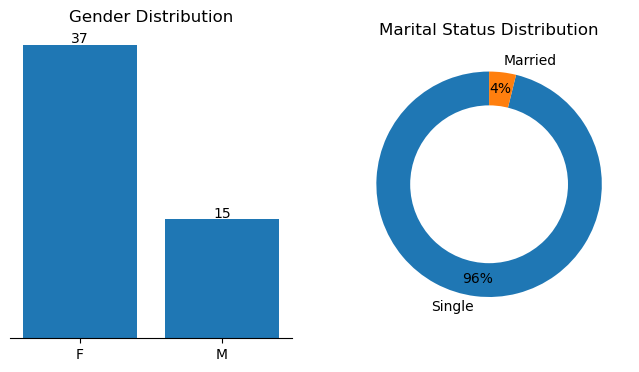

In [163]:
#plot a bar chart and pie chart of the Gender and Marital Status respectively
fig, ax = plt.subplots(1,2, figsize=[8,4])

ax[0].bar(x=df['Gender'].value_counts().index, height=df['Gender'].value_counts().values)
ax[1].pie(df['Marital Status'].value_counts().values, labels=df['Marital Status'].value_counts().index, startangle=90, 
          autopct="%.0f%%", pctdistance=0.85)

donut_hole = plt.Circle((0,0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(donut_hole)

#add title
ax[0].set_title('Gender Distribution')
ax[1].set_title('Marital Status Distribution')

#remove spines
ax[0].spines[['top', 'left', 'right']].set_visible(False)

#remove y-axis
ax[0].yaxis.set_visible(False)

#add annotation
for index, values in enumerate(df['Gender'].value_counts()):
    ax[0].annotate(values, xy=(index, values+0.7), ha='center', va='center')


plt.show()
          

#### Student Age Distribution

In [60]:
#Age distribution of the students
df['Student Age'].value_counts().sort_index(ascending=True)

Student Age
17     7
18    23
19     9
20     7
21     1
22     1
23     1
24     1
25     2
Name: count, dtype: int64

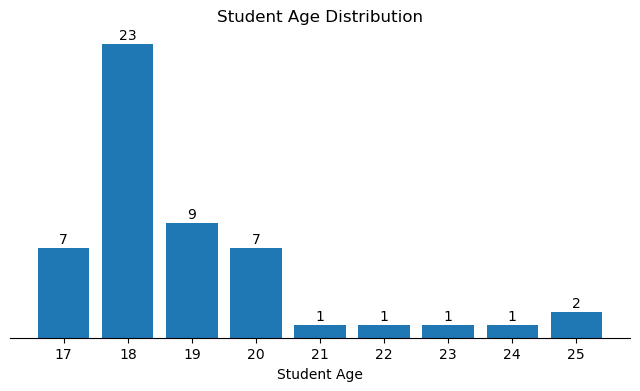

In [81]:
#plot a bar chart of the student age

#create a dataframe of the student age
age = df.groupby(['Student Age'], as_index=False).agg(total_no = ('Student Name', 'count'))

#cast the student age as string
age['Student Age'] = age['Student Age'].astype('str')

#create a percentage
age['perc'] = ((age['total_no']/age['total_no'].sum())*100).round(0)

fig, ax = plt.subplots(figsize=[8,4])
ax.bar(x=age['Student Age'], height=age['total_no'])

#add title
ax.set_title('Student Age Distribution')
ax.set_xlabel('Student Age')

#remove spines
ax.spines[['top', 'left', 'right']].set_visible(False)

#remove y-axis
ax.yaxis.set_visible(False)

#add annotation
for index, values in enumerate(age['total_no']):
    ax.annotate(values, xy=(index, values+0.7), ha='center', va='center')

#this code is for adding both the count and percentage as data labels
# for i, (v,p) in enumerate(zip(age['total_no'], age['perc'])):
#     ax.text(i, v, f"{v}({p:.1f}%)", ha="center")
    
plt.show()

- 7 students are 17 years old, the rest are above 18 years with about 44% at 18 years

#### Distriution of courses registered

In [85]:
#to get the distriution of courses registered
df['Course Registered'].value_counts()

Course Registered
Nursing                   26
Medicine                   6
Pharmacy                   4
Computer Science           4
Med Lab                    4
Radiography                2
Cyber Security             1
Med Rehabilitation         1
Industrial Chemistry       1
Civil Engineer             1
Mechanical Eng             1
Electrical Engineering     1
Name: count, dtype: int64

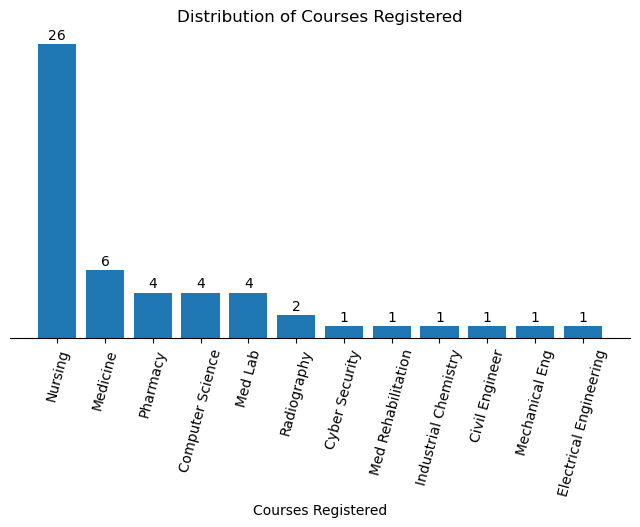

In [94]:
fig, ax = plt.subplots(figsize=[8,4])
ax.bar(x=df['Course Registered'].value_counts().index, height=df['Course Registered'].value_counts().values)

#add title
ax.set_title('Distribution of Courses Registered')
ax.set_xlabel('Courses Registered')
ax.yaxis.set_visible(False)

ax.xaxis.set_tick_params(rotation=75)

ax.spines[['top', 'left', 'right']].set_visible(False)

for index, values in enumerate(df['Course Registered'].value_counts()):
    ax.annotate(values, xy=(index, values+0.8), ha='center', va='center')

plt.show()

- With the demand for professional nurses both within the country and outside about 26 students which is 50% of the students applied to study Nursing

In [100]:
#distribution of Nursing and Gender
nursing = df[df['Course Registered']=="Nursing"].groupby(['Gender'], as_index=False).agg(total_no=('Student Name', 'count'))
nursing

,Gender,total_no
0,F,22
1,M,4


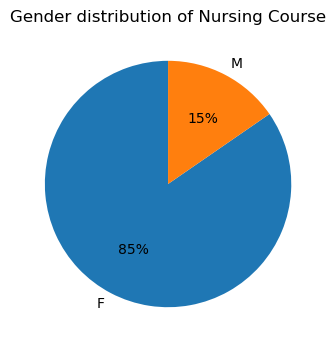

In [104]:
fig, ax = plt.subplots(figsize=[5,4])

ax.pie(nursing['total_no'], labels=nursing['Gender'], autopct="%.0f%%", startangle=90)

ax.set_title('Gender distribution of Nursing Course')

plt.show()

- 85% of the student that applied for nursing courses are female, while 15% are male

In [105]:
#to get the distriution of University registered
df['University Registered'].value_counts()

University Registered
Unizik                42
UNN                    5
IMSU                   1
college of nursing     1
Funai                  1
Uniport                1
ANSU                   1
Name: count, dtype: int64

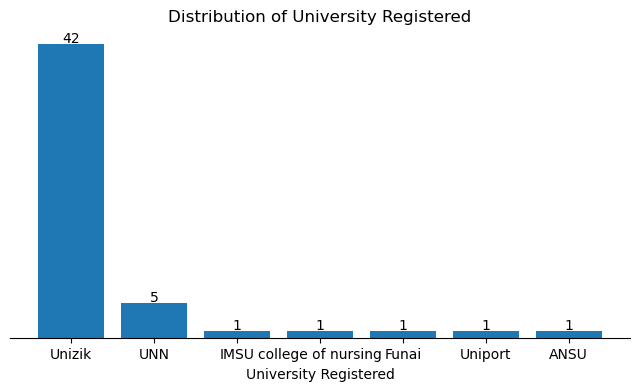

In [107]:
fig, ax = plt.subplots(figsize=[8,4])
ax.bar(x=df['University Registered'].value_counts().index, height=df['University Registered'].value_counts().values)

#add title
ax.set_title('Distribution of University Registered')
ax.set_xlabel('University Registered')
ax.yaxis.set_visible(False)

#ax.xaxis.set_tick_params(rotation=75)

ax.spines[['top', 'left', 'right']].set_visible(False)

for index, values in enumerate(df['University Registered'].value_counts()):
    ax.annotate(values, xy=(index, values+0.8), ha='center', va='center')

plt.show()

- Nnamdi Azikiwe University (Unizik) is the most popular choice for students with about 80% of the choice

#### Timeline of student registration at the center

In [110]:
reg = df.groupby(['Date Registered'], as_index=False).agg(total_no=('Student Name', 'count'))
reg.head()

,Date Registered,total_no
0,2024-01-08,1
1,2024-01-09,1
2,2024-01-10,4
3,2024-01-11,4
4,2024-01-15,3


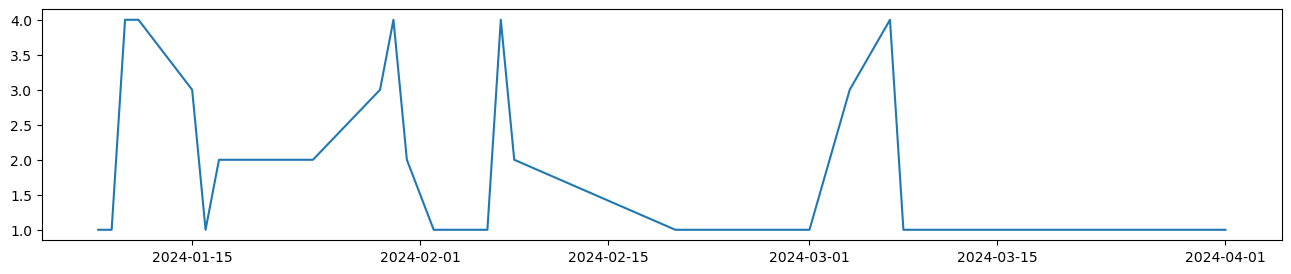

In [115]:
#plot a linechart of the timeline
fig, ax = plt.subplots(figsize=[16,3])
ax.plot(reg['Date Registered'], reg['total_no'])

plt.show()

#### Distribution of the Work Status

In [116]:
#distribution of the work status
df['Work Status'].value_counts()

Work Status
No     42
Yes    10
Name: count, dtype: int64

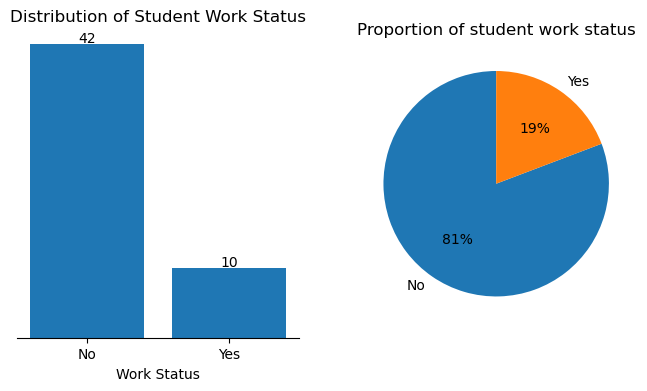

In [122]:
fig, ax = plt.subplots(1, 2, figsize=[8,4])
ax[0].bar(x=df['Work Status'].value_counts().index, height=df['Work Status'].value_counts().values)

#add title
ax[0].set_title('Distribution of Student Work Status')
ax[0].set_xlabel('Work Status')
ax[0].yaxis.set_visible(False)

#ax.xaxis.set_tick_params(rotation=75)

ax[0].spines[['top', 'left', 'right']].set_visible(False)

for index, values in enumerate(df['Work Status'].value_counts()):
    ax[0].annotate(values, xy=(index, values+0.8), ha='center', va='center')

#plot 2
ax[1].pie(df['Work Status'].value_counts().values, labels=df['Work Status'].value_counts().index, autopct="%.0f%%", startangle=90)

ax[1].set_title('Proportion of student work status')

plt.show()

- About 19% of the students work and attend lesson while 81% do not work

#### Distribution of hours read

In [124]:
#distribution of number of hours the student read per day
df['Hours Read'].value_counts().sort_index(ascending=True)

Hours Read
2     11
3     25
4     11
5      3
7      1
10     1
Name: count, dtype: int64

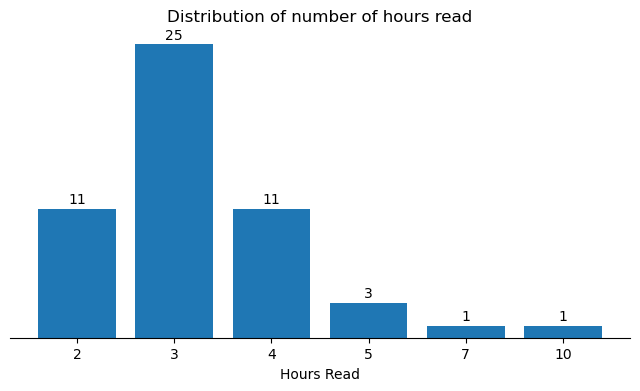

In [130]:
#plot a bar chart of number of hours read

fig, ax = plt.subplots(figsize=[8,4])
hr_read = df.groupby(['Hours Read'], as_index=False).agg(total_hours=('Student Name', 'count'))

#casting hours read as string
hr_read['Hours Read']=hr_read['Hours Read'].astype('str')

ax.bar(x=hr_read['Hours Read'], height=hr_read['total_hours'])

#add title
ax.set_title('Distribution of number of hours read')
ax.set_xlabel('Hours Read')
ax.yaxis.set_visible(False)

#ax.xaxis.set_tick_params(rotation=75)

ax.spines[['top', 'left', 'right']].set_visible(False)

for index, values in enumerate(hr_read['total_hours']):
    ax.annotate(values, xy=(index, values+0.8), ha='center', va='center')

plt.show()

- Majority of the student read between 2 to 4 hours each day with about 25 students reading 3 hours each day

In [132]:
df['Teaching Satisfaction'].value_counts()

Teaching Satisfaction
5    35
4    16
3     1
Name: count, dtype: int64

In [134]:
#Avg Satisfaction
df['Teaching Satisfaction'].sum()/len(df)

4.653846153846154

In [ ]:
# Very Satisfied, Satisfied, Neutral, Dissatisfied, Very Disatisfied

In [135]:
#creating a list of satisfaction 
sat = []
for x in df['Teaching Satisfaction']:
    if x == 1:
        sat.append('Very Dissatisfied')
    elif x == 2:
        sat.append('Dissatisfied')
    elif x == 3:
        sat.append('Neutral')
    elif x == 4:
        sat.append('Satisfied')
    elif x == 5:
        sat.append('Very Satisfied')

In [137]:
#create a satisfaction column in the dataframe
df['Satisfaction'] = sat

In [139]:
#checking the distribution of Satisfaction
df['Satisfaction'].value_counts()

Satisfaction
Very Satisfied    35
Satisfied         16
Neutral            1
Name: count, dtype: int64

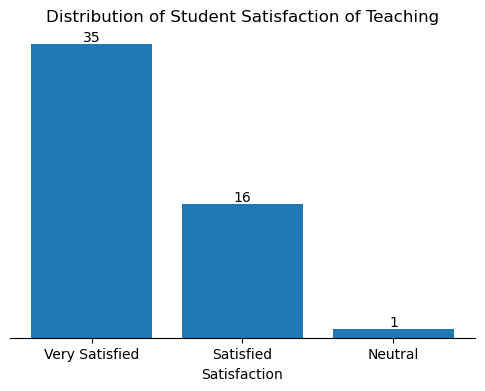

In [141]:
#plot a bar chart of Student satisfaction

fig, ax = plt.subplots(figsize=[6,4])

ax.bar(x=df['Satisfaction'].value_counts().index, height=df['Satisfaction'].value_counts().values)

#add title
ax.set_title('Distribution of Student Satisfaction of Teaching')
ax.set_xlabel('Satisfaction')
ax.yaxis.set_visible(False)

#ax.xaxis.set_tick_params(rotation=75)

ax.spines[['top', 'left', 'right']].set_visible(False)

for index, values in enumerate(df['Satisfaction'].value_counts()):
    ax.annotate(values, xy=(index, values+0.8), ha='center', va='center')


plt.show()

- About 98% of the students were satisfied with the teaching that was delivered

#### Distribution of Student who **Finished on time, Computer off**

In [143]:
df['Finished on time'].value_counts()

Finished on time
Yes    41
No     10
yes     1
Name: count, dtype: int64

- This shows that there is inconsistency in the values

In [144]:
#replacing yes with Yes
df['Finished on time'] = df['Finished on time'].str.replace('yes', 'Yes')

In [145]:
#checking if the value have been replaced
df['Finished on time'].value_counts()

Finished on time
Yes    42
No     10
Name: count, dtype: int64

- 42 students finished on time while 10 didn't

In [146]:
#checking the distribution of students whose computer went off
df['Computer Off'].value_counts()

Computer Off
No     42
yes     8
no      2
Name: count, dtype: int64

In [147]:
#inconsistency in the values, replace no with No
df['Computer Off'] = df['Computer Off'].str.replace('no', 'No')

In [148]:
#checking if the values have been replaced
df['Computer Off'].value_counts()

Computer Off
No     44
yes     8
Name: count, dtype: int64

- Only 8 students indicated that their computer went off during the exam

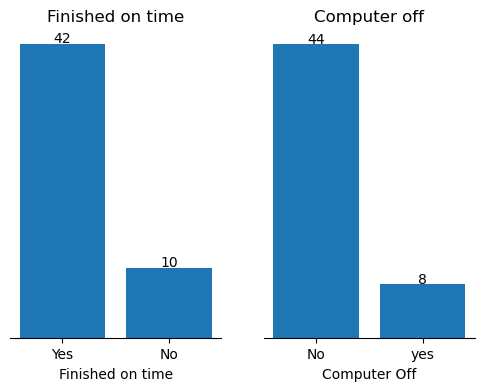

In [151]:
#plot a bar chart

fig, ax = plt.subplots(1, 2, figsize=[6,4])

ax[0].bar(x=df['Finished on time'].value_counts().index, height=df['Finished on time'].value_counts().values)
ax[1].bar(x=df['Computer Off'].value_counts().index, height=df['Computer Off'].value_counts().values)

#add title
ax[0].set_title('Finished on time')
ax[0].set_xlabel('Finished on time')
ax[0].yaxis.set_visible(False)

#add title
ax[1].set_title('Computer off')
ax[1].set_xlabel('Computer Off')
ax[1].yaxis.set_visible(False)

#ax.xaxis.set_tick_params(rotation=75)

ax[0].spines[['top', 'left', 'right']].set_visible(False)
ax[1].spines[['top', 'left', 'right']].set_visible(False)

for index, values in enumerate(df['Finished on time'].value_counts()):
    ax[0].annotate(values, xy=(index, values+0.8), ha='center', va='center')
for index, values in enumerate(df['Computer Off'].value_counts()):
    ax[1].annotate(values, xy=(index, values+0.8), ha='center', va='center')


plt.show()

- 42 students finished on time while 10 didn't
- Only 8 students indicated that their computer went off during the exam

#### Distribution of Student who payed for the lesson by themselves

In [153]:
#student who payed themselves
df['Pay Yourself'].value_counts()

Pay Yourself
no     35
Yes    16
yes     1
Name: count, dtype: int64

In [154]:
#replace yes with Yes
df['Pay Yourself'] = df['Pay Yourself'].str.replace('yes', 'Yes')

In [155]:
df['Pay Yourself'].value_counts()

Pay Yourself
no     35
Yes    17
Name: count, dtype: int64

In [157]:
df['Close Proximity to center'].value_counts()

Close Proximity to center
yes    32
No     20
Name: count, dtype: int64

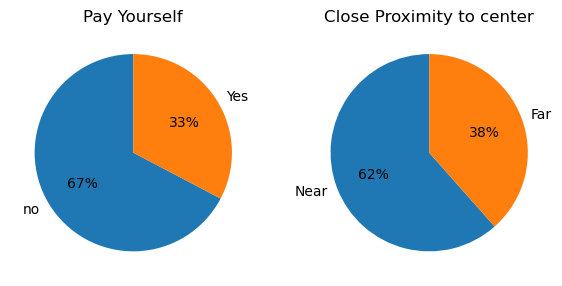

In [164]:
#plot a pie-chart
fig, ax = plt.subplots(1, 2, figsize=[7,4])
ax[0].pie(df['Pay Yourself'].value_counts().values, labels=df['Pay Yourself'].value_counts().index, autopct="%.0f%%", startangle=90)
ax[1].pie(df['Close Proximity to center'].value_counts().values, labels=['Near', 'Far'], 
          autopct="%.0f%%", startangle=90)

#add title
ax[0].set_title('Pay Yourself')
ax[1].set_title('Close Proximity to center')

plt.show()

- About 33% of the student payed for the lesson by themselves
- About 38% of the students live far from the center and takes a taxi to come

## Data Analysis

### Question 1: What is the highest and lowest score in 2024 JAMB

In [165]:
#Find the highest score
highest_score = df['Score 2024'].max()
highest_score

290

In [167]:
#Find the lowest score
lowest_score = df['Score 2024'].min()
lowest_score

148

### Question 2: What are the top five scores and least five scores

#### Top 5 Scores

In [173]:
#top five scores
top_5_score = df[['Student Name' ,'Score 2024']].sort_values('Score 2024', ascending=False).head(5)
top_5_score

,Student Name,Score 2024
8,Anatogu Chidiebere,290
15,Odinaka Precious,278
25,Kate Iwobi,269
38,Amarachi Aneke,264
36,Oluebube Aneke,263


In [175]:
#assign a default index to the student
top_5_score['Rank'] = ['Top 1', 'Top 2', 'Top 3', 'Top 4', 'Top 5']

In [176]:
top_5_score

,Student Name,Score 2024,Rank
8,Anatogu Chidiebere,290,Top 1
15,Odinaka Precious,278,Top 2
25,Kate Iwobi,269,Top 3
38,Amarachi Aneke,264,Top 4
36,Oluebube Aneke,263,Top 5


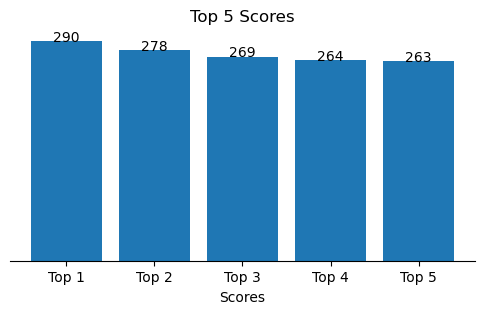

In [184]:
#plot a bar chart of the top 5 scores
fig, ax = plt.subplots(figsize=[6,3])

ax.bar(x=top_5_score['Rank'], height=top_5_score['Score 2024'])

#add title and labels
ax.set_title('Top 5 Scores')
ax.set_xlabel('Scores')

#remove spines
ax.spines[['top', 'left', 'right']].set_visible(False)
ax.yaxis.set_visible(False)

#add annotation
for index, values in enumerate(top_5_score['Score 2024']):
    ax.annotate(values, xy=(index, values+5), ha='center', va='center')
plt.show()

#### Least 5 Scores

In [185]:
#least 5 scores
least_5_scores = df[['Student Name', 'Score 2024']].sort_values('Score 2024', ascending=False).tail(5)
least_5_scores

,Student Name,Score 2024
19,Akujieze Kosiso,168
35,Uche JohnMary,162
30,Uzochukwu Promise,161
41,Ndubude Jane,159
45,Ezinwanne Chinonso,148


In [187]:
#assign a default index to the student
least_5_scores['Rank'] = ['bottom 5', 'bottom 4', 'bottom 3', 'bottom 2', 'bottom 1']
least_5_scores

,Student Name,Score 2024,Rank
19,Akujieze Kosiso,168,bottom 5
35,Uche JohnMary,162,bottom 4
30,Uzochukwu Promise,161,bottom 3
41,Ndubude Jane,159,bottom 2
45,Ezinwanne Chinonso,148,bottom 1


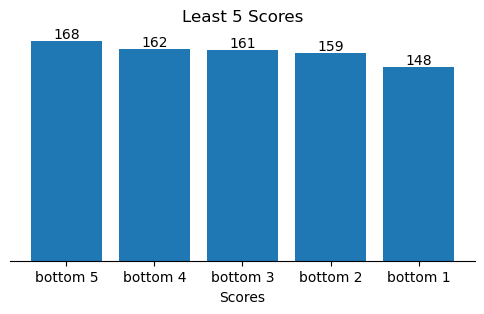

In [188]:
#plot a bar chart of the least 5 scores
fig, ax = plt.subplots(figsize=[6,3])

ax.bar(x=least_5_scores['Rank'], height=least_5_scores['Score 2024'])

#add title and labels
ax.set_title('Least 5 Scores')
ax.set_xlabel('Scores')

#remove spines
ax.spines[['top', 'left', 'right']].set_visible(False)
ax.yaxis.set_visible(False)

#add annotation
for index, values in enumerate(least_5_scores['Score 2024']):
    ax.annotate(values, xy=(index, values+5), ha='center', va='center')
plt.show()

### Question 3: What Percentage Score below 200, 200-249 and above 250

##### Create a range for below 200, 200-249, 250-299, 300 above

In [192]:
#create a list of score range
score_range = []
for x in df['Score 2024']:
    if x < 200:
        score_range.append('Below 200')
    elif x < 250:
        score_range.append('200 - 249')
    elif x < 300:
        score_range.append('250 - 299')
    elif x > 300:
        score_range.append('Above 300')


In [193]:
#create a column score range
df['Score Range'] = score_range

In [196]:
#group by score range
score_category = df.groupby(['Score Range'], as_index=False).agg(total_no = ('Student Name', 'count'))
score_category

,Score Range,total_no
0,200 - 249,27
1,250 - 299,8
2,Below 200,17


In [198]:
#create the percentage os score category
score_category['perc'] = ((score_category['total_no']/score_category['total_no'].sum())*100).round(0)
score_category

,Score Range,total_no,perc
0,200 - 249,27,52.0
1,250 - 299,8,15.0
2,Below 200,17,33.0


In [203]:
#indexing the category
cat_index = []
for x in score_category['Score Range']:
    if x == 'Below 200':
        cat_index.append(1)
    elif x == '200 - 249':
        cat_index.append(2)
    elif x == '250 - 299':
        cat_index.append(3)
score_category['index'] = cat_index
score_category

,Score Range,total_no,perc,index
0,200 - 249,27,52.0,2
1,250 - 299,8,15.0,3
2,Below 200,17,33.0,1


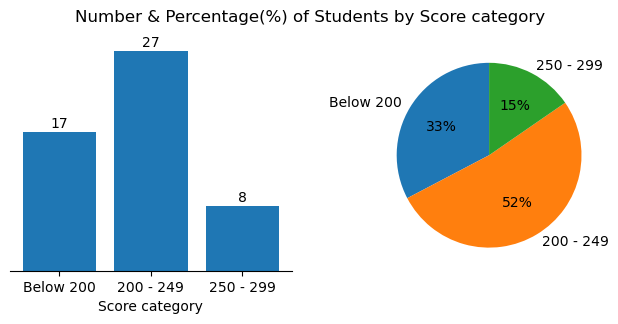

In [212]:
#plot a bar chart of the least 5 scores
fig, ax = plt.subplots(1, 2, figsize=[8,3])

#sort the dataframe
score_category_sorted = score_category.sort_values('index', ascending=True)
ax[0].bar(x=score_category_sorted['Score Range'], height=score_category_sorted['total_no'])

#add title and labels
fig.suptitle('Number & Percentage(%) of Students by Score category')
ax[0].set_xlabel('Score category')

#remove spines
ax[0].spines[['top', 'left', 'right']].set_visible(False)
ax[0].yaxis.set_visible(False)

#add annotation
for index, values in enumerate(score_category_sorted['total_no']):
    ax[0].annotate(values, xy=(index, values+1), ha='center', va='center')

#second plot
ax[1].pie(score_category_sorted['total_no'], labels=score_category_sorted['Score Range'], autopct="%.0f%%", startangle=90)
plt.show()

- The chart shows that more than 50% score between **200-249**, 15% scored between **250-299** and 33% scored below 200

### Mean JAMB Score

In [218]:
mean_score = df['Score 2024'].mean()
mean_score

212.73076923076923

### Mean JAMB Score by Gender

In [216]:
mean_score_gender = df.groupby(['Gender'], as_index=False).agg(mean_score=('Score 2024', 'mean'))
mean_score_gender

,Gender,mean_score
0,F,211.783784
1,M,215.066667


#### The distribution of score by gender

In [228]:
#filter by gender=male
male_gender = df[df['Gender']=="M"]
female_gender = df[df['Gender']=='F']

C:\Users\MR VALENTINE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


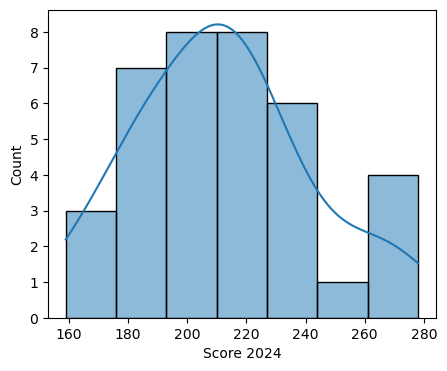

In [233]:
#plot the distribution of the score by female
fig, ax = plt.subplots(figsize=[5,4])

sns.histplot(data=female_gender, x='Score 2024', kde=True)
plt.show()

- The JAMB score for the female student is normally distributed

### Question 4: What is the total revenue generated and by month?

In [234]:
df.columns

Index(['Student Name', 'Marital Status', 'Gender', 'Score 2023', 'Score 2024',
       'English', 'Chemistry', 'Physics', 'Biology', 'Total', 'Date of Birth',
       'Course Registered', 'University Registered', 'Date Registered',
       'Date Stopped', 'Lesson Fee', 'Work Status', 'Hours Read',
       'Read Past Questions', 'Teaching Satisfaction', 'Finished on time',
       'Computer Off', 'Questions Different', 'Pay Yourself',
       'Close Proximity to center', 'Student Age', 'Month Registered',
       'Month Name', 'Month Stopped', 'Lesson Duration (Months)',
       'Total Lesson Fee', 'Satisfaction', 'Score Range'],
      dtype='object')

#### Number of Student enrolled per month

In [240]:
#Number of student enrolled by month
student_reg = df.groupby(['Month Registered', 'Month Name'], as_index=False).agg(student_reg=('Student Name', 'count')).sort_values('Month Registered', 
                                                                                                                                    ascending=True)
student_reg

,Month Registered,Month Name,student_reg
0,1,January,33
1,2,February,9
2,3,March,9
3,4,April,1


In [235]:
#determine the total revenue generated
total_revenue = df['Total Lesson Fee'].sum()
total_revenue

1584000

#### Total Revenue in January

In [242]:
#filter student who registered in January
jan_reg = df[df['Date Registered']<= '2024-01-31']

In [264]:
r_jan = jan_reg.groupby(['Month Name'], as_index=False).agg(Student_Reg=('Student Name', 'count'), Total_Revenue=('Lesson Fee', 'sum'))
r_jan

,Month Name,Student_Reg,Total_Revenue
0,January,33,429000


#### Total Revenue in February

In [250]:
#filter student who registered between january and feb
feb_reg = df[df['Date Registered']<= '2024-02-29']

In [252]:
feb_reg['Month Name'].value_counts()

Month Name
January     33
February     9
Name: count, dtype: int64

In [253]:
#create a column with the same month name 'February
list1 = []
for x in feb_reg['Student Name']:
    list1.append('February')


In [256]:
feb_reg['Month_name'] = list1

C:\Users\MR VALENTINE\AppData\Local\Temp\ipykernel_11328\939676874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feb_reg['Month_name'] = list1


In [265]:
#group by month
r_feb = feb_reg.groupby(['Month_name'], as_index=False).agg(Student_Reg=('Student Name', 'count'), Total_Revenue=('Lesson Fee', 'sum'))
r_feb

,Month_name,Student_Reg,Total_Revenue
0,February,42,527000


#### Total Revenue in March

In [259]:
#filter student who registered between january and march
mar_reg = df[df['Date Registered']<= '2024-03-31']

In [260]:
mar_reg['Month Name'].value_counts()

Month Name
January     33
February     9
March        9
Name: count, dtype: int64

In [261]:
#create a column with the same month name 'February
list2 = []
for x in mar_reg['Student Name']:
    list2.append('March')


In [262]:
mar_reg['Month_name'] = list2

C:\Users\MR VALENTINE\AppData\Local\Temp\ipykernel_11328\1224236231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mar_reg['Month_name'] = list2


In [266]:
#group by month
r_mar = mar_reg.groupby(['Month_name'], as_index=False).agg(Student_Reg=('Student Name', 'count'), Total_Revenue=('Lesson Fee', 'sum'))
r_mar

,Month_name,Student_Reg,Total_Revenue
0,March,51,628000


In [267]:
#rename columns
r_feb.rename(columns={
    'Month_name': 'Month Name'
}, inplace=True
            )

r_mar.rename(columns={
    'Month_name': 'Month Name'
}, inplace=True
            )

In [268]:
r_jan

,Month Name,Student_Reg,Total_Revenue
0,January,33,429000


In [269]:
r_feb

,Month Name,Student_Reg,Total_Revenue
0,February,42,527000


In [270]:
r_mar

,Month Name,Student_Reg,Total_Revenue
0,March,51,628000


In [272]:
#concact the three dataframe
rev_concact = pd.concat([r_jan, r_feb, r_mar])
rev_concact

,Month Name,Student_Reg,Total_Revenue
0,January,33,429000
0,February,42,527000
0,March,51,628000


In [273]:
rev_concact.reset_index()

,index,Month Name,Student_Reg,Total_Revenue
0,0,January,33,429000
1,0,February,42,527000
2,0,March,51,628000


In [274]:
#drop the index column
rev_concact.drop('index', axis=1, inplace=True)

KeyError: "['index'] not found in axis"

In [275]:
rev_concact.columns

Index(['Month Name', 'Student_Reg', 'Total_Revenue'], dtype='object')

In [276]:
rev_concact

,Month Name,Student_Reg,Total_Revenue
0,January,33,429000
0,February,42,527000
0,March,51,628000


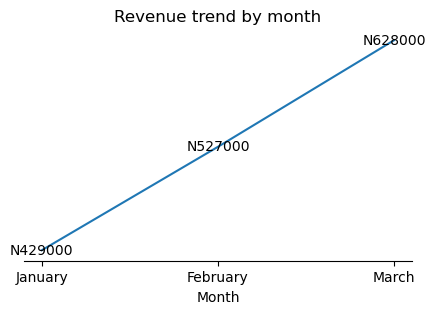

In [281]:
#plot a line chart of the revenue trend

fig, ax = plt.subplots(figsize=[5,3])
ax.plot(rev_concact['Month Name'], rev_concact['Total_Revenue'])

#add title
ax.set_title('Revenue trend by month')
ax.set_xlabel('Month')

ax.spines[['top', 'right', 'left']].set_visible(False)
ax.yaxis.set_visible(False)

for index, values in enumerate(rev_concact['Total_Revenue']):
    ax.annotate('N'+ str(values), xy=(index, values), ha='center', va='center')
plt.show()